#  Diabetes Prediction using KNN

**A machine learning project to predict diabetes using the
Pima Indians Diabetes Dataset.**

**Dataset:** 768 patients | **Features:** 8 | **Target:** Diabetes (0/1)


# Step 1: Import Libraries
**Importing all necessary libraries for data analysis, visualization, and modeling.**


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Step 2: Load & Explore Dataset
**Loading the diabetes dataset and previewing the first 5 rows.**



In [5]:
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
df.shape

(768, 9)

# Step 3: Check Missing Values
**Checking for null values in the dataset.**

In [6]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# Step 4: Exploratory Data Analysis (EDA)
Plotting a correlation heatmap to understand feature relationships.
>  Key Finding: **Glucose** has the highest correlation with Outcome (0.46)


In [7]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


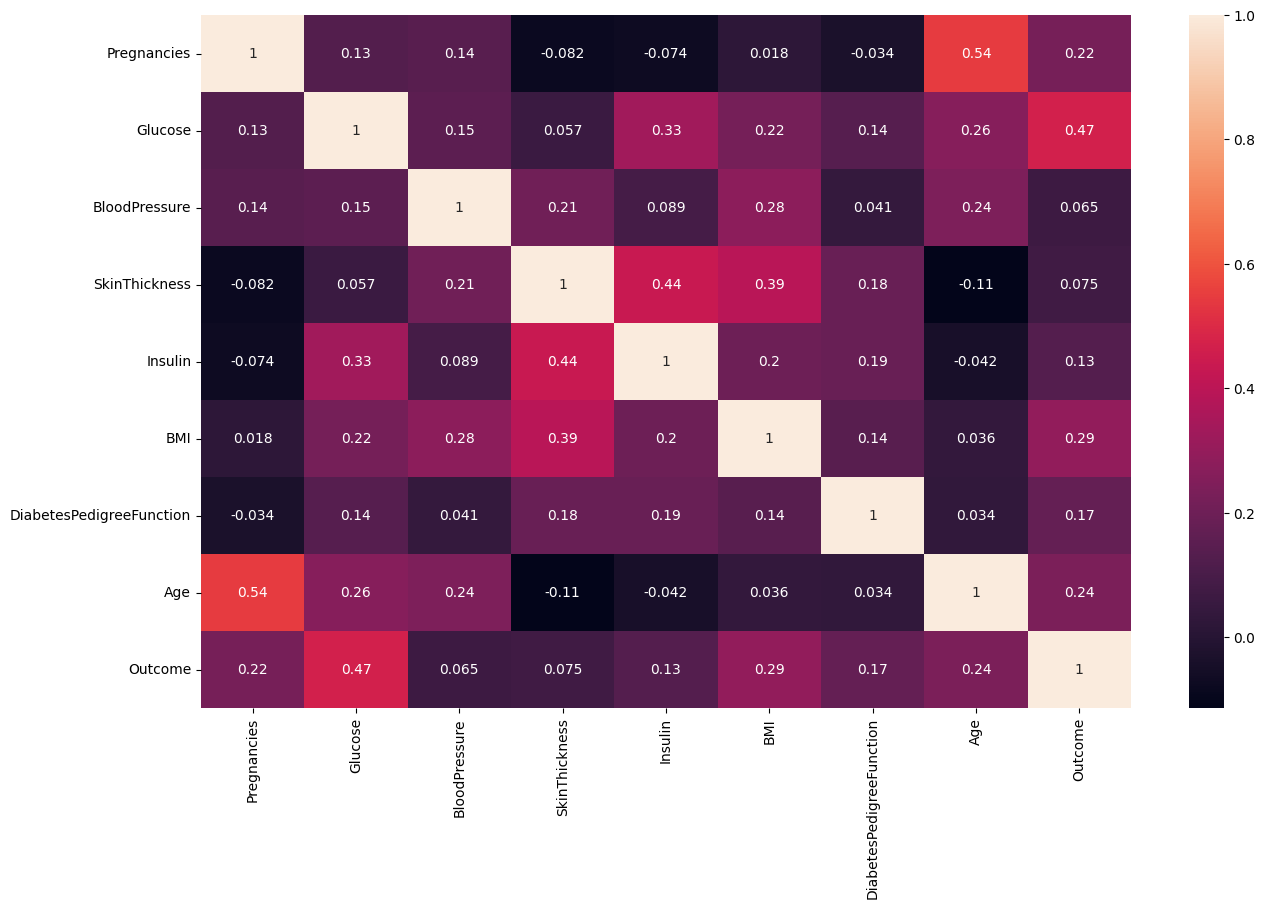

In [8]:
plt.figure(figsize=(15,9))
ax = sns.heatmap(df.corr(), annot = True)
plt.show()

# Step 5: Handle Zero Values
Columns like Glucose, BloodPressure, BMI cannot have 0 medically.
Replacing zero values with column **mean/median**.


In [9]:
df['Glucose']       = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['Insulin']       = df['Insulin'].replace(0, df['Insulin'].median())
df['BMI']           = df['BMI'].replace(0, df['BMI'].mean())
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].replace(0, df['DiabetesPedigreeFunction'].median())
df['Age']           = df['Age'].replace(0, df['Age'].median())

In [10]:
x = df.drop(columns = 'Outcome', axis = 1)
y = df['Outcome']

# Step 6: Visualize Data Distribution (Before Scaling)
**Boxplots to visualize spread and outliers in each feature.**


<Axes: >

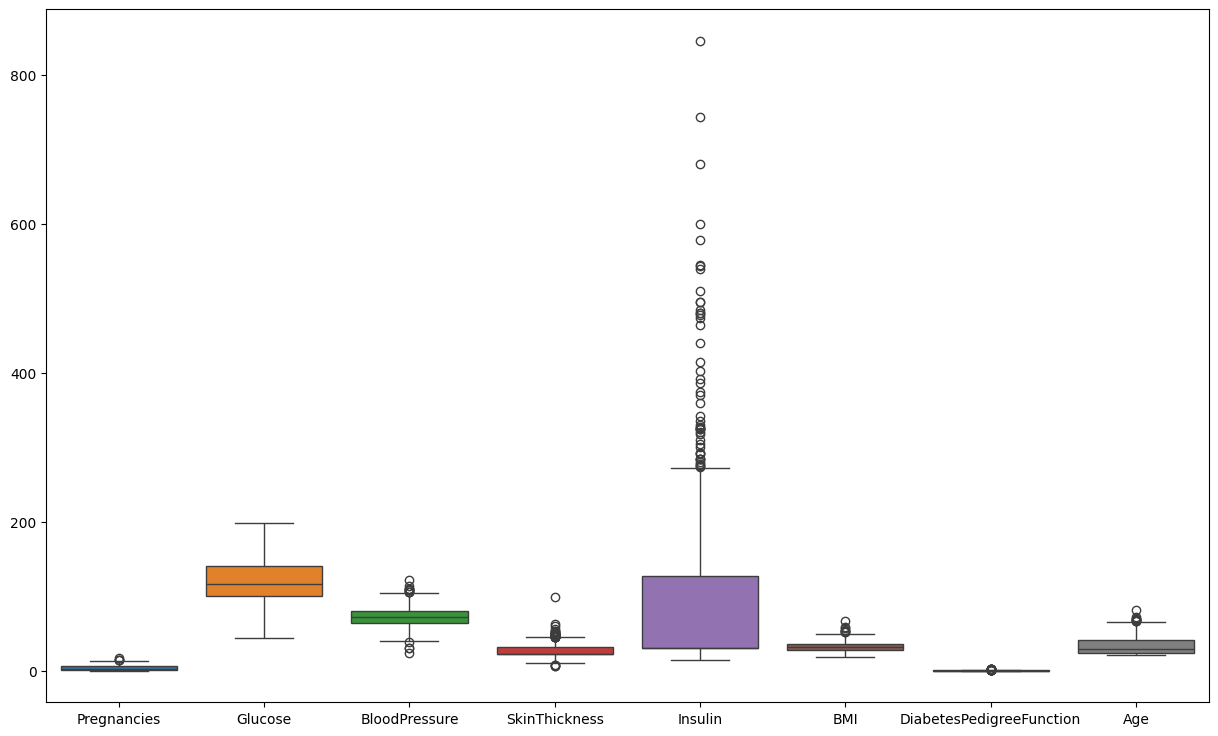

In [11]:
fig, ax = plt.subplots(figsize = (15,9))
sns.boxplot(data = x, ax=ax)

#Step 7: Remove Outliers using IQR Method
**Using Interquartile Range (IQR) to detect and remove outliers.**
> **Formula: Lower Bound = Q1 - 1.5×IQR | Upper Bound = Q3 + 1.5×IQR**


In [12]:
cols = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
mask = pd.Series([True] * len(x), index=x.index)
for col in cols:
  Q1 = x[col].quantile(0.25)
  Q3 = x[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bond = Q1 - 1.5 * IQR
  upper_bond = Q3 + 1.5 * IQR
  col_mask = (x[col] >= lower_bond) & (x[col] <= upper_bond)
  mask = mask & col_mask

In [13]:
x_clean = x[mask]
y_clean = y[mask]

#  Step 8A: Feature Scaling (StandardScaler)
**KNN is a distance based algorithm scaling is mandatory.**
**Applying StandardScaler to normalize all features (mean=0, std=1).**


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_clean)

In [15]:
x_scaled= pd.DataFrame(x_scaled, columns = cols)
x_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,6.360000e+02,6.360000e+02,6.360000e+02,6.360000e+02,6.360000e+02,6.360000e+02,6.360000e+02,6.360000e+02
mean,-7.261836e-17,-4.468822e-17,-3.463337e-16,1.005485e-16,-1.675808e-17,7.541138e-16,2.820944e-16,8.937644e-17
std,1.000787e+00,1.000787e+00,1.000787e+00,1.000787e+00,1.000787e+00,1.000787e+00,1.000787e+00,1.000787e+00
min,-1.176307e+00,-2.596463e+00,-2.574533e+00,-2.155558e+00,-9.531396e-01,-2.144886e+00,-1.395052e+00,-1.052454e+00
25%,-8.656216e-01,-6.769160e-01,-7.156939e-01,-4.122191e-01,-6.891945e-01,-7.129663e-01,-7.472554e-01,-7.761629e-01
50%,-2.442499e-01,-1.534031e-01,-1.580423e-01,-4.122191e-01,-6.891945e-01,-1.291660e-02,-3.153911e-01,-3.156782e-01
75%,6.878077e-01,5.795149e-01,5.854932e-01,6.606049e-01,5.794449e-01,5.956493e-01,6.522293e-01,6.052912e-01
max,2.862609e+00,2.743368e+00,3.001984e+00,2.538047e+00,3.423241e+00,2.914564e+00,3.139523e+00,3.091909e+00


# Step 8B: Visualize After Scaling
**Boxplot after StandardScaler, all features now on same scale**


<Axes: >

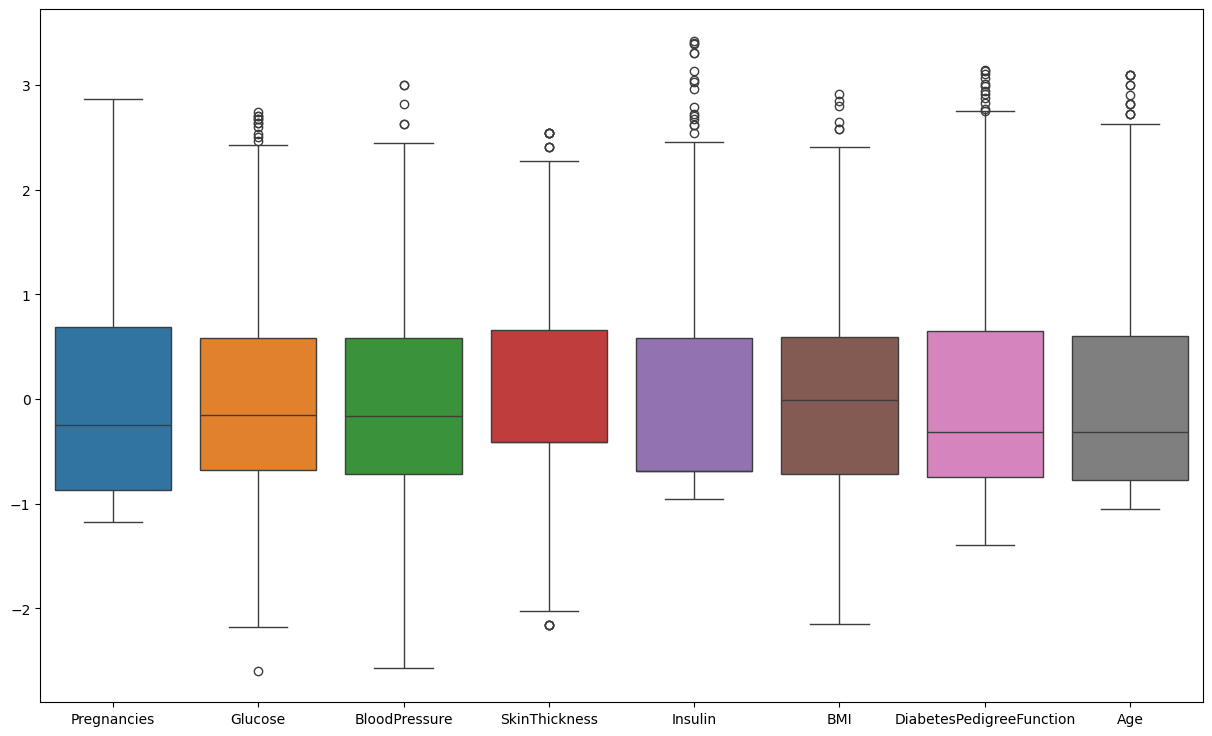

In [16]:
fig, ax = plt.subplots(figsize = (15,9))
sns.boxplot(data = x_scaled, ax=ax)

# Step 9: Train-Test Split
Splitting data into **70% training** and **30% testing** sets.
- Train shape: (445, 8)
- Test shape: (191, 8)


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_clean, y_clean, test_size = 0.3, random_state = 42)

In [18]:
x_train.shape

(445, 8)

In [19]:
x_test.shape

(191, 8)

In [20]:
y_train.value_counts()

,count
Outcome,
0,308
1,137


# Step 10: Handle Class Imbalance using SMOTE
**Dataset is imbalanced — Class 0: 308, Class 1: 137.**
**Using SMOTE (Synthetic Minority Oversampling Technique) to balance classes.**
>  **After SMOTE: Class 0: 308 | Class 1: 308**


In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Check resampled class distribution
print("\nResampled class distribution:")
print(pd.Series(y_train_resampled).value_counts())


Resampled class distribution:
Outcome
0    308
1    308
Name: count, dtype: int64


# Step 11: Train KNN Model
**Training KNeighborsClassifier on the balanced (SMOTE) training data.**


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier()

In [23]:
knn.fit(x_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [24]:
y_pred = knn.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0])

# Step 12: Initial Model Evaluation
**Evaluating model with default K=5**.


In [25]:
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred))

Confusion matrix
[[90 37]
 [19 45]]


In [26]:
print('Classfication Report')
print(classification_report(y_test, y_pred))

Classfication Report
              precision    recall  f1-score   support

           0       0.83      0.71      0.76       127
           1       0.55      0.70      0.62        64

    accuracy                           0.71       191
   macro avg       0.69      0.71      0.69       191
weighted avg       0.73      0.71      0.71       191



# Step 13: Find Best K Value (K Tuning)
**Testing K values from 1 to 20 and plotting error rate for each.**
> **Lower error rate = Better model**


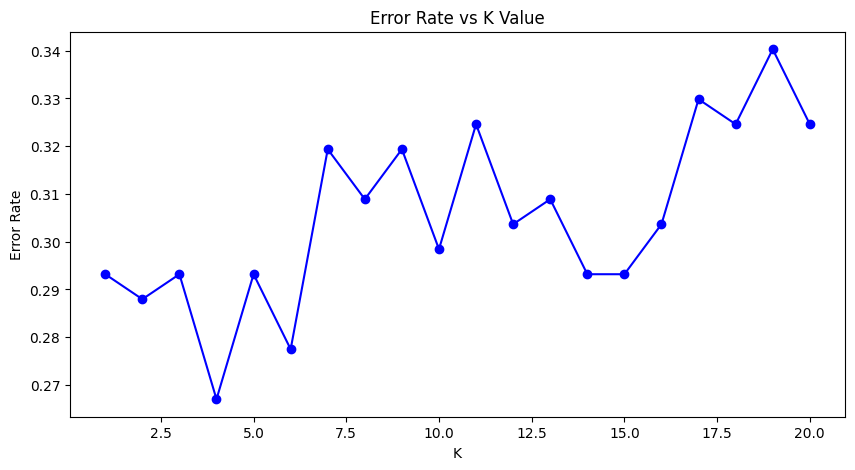

Best K = 4


In [27]:
error_rate = []
for k in range(1, 21):
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(x_train_resampled, y_train_resampled)
    error_rate.append(np.mean(knn_k.predict(x_test) != y_test))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), error_rate, marker='o', color='blue')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

best_k = error_rate.index(min(error_rate)) + 1
print(f"Best K = {best_k}")

# Step 14: Final Model with Best K = 4
**Training final KNN model using Best K = 4 (lowest error rate)**.


Best K = 4

Final Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       127
           1       0.59      0.67      0.63        64

    accuracy                           0.73       191
   macro avg       0.71      0.72      0.71       191
weighted avg       0.74      0.73      0.74       191



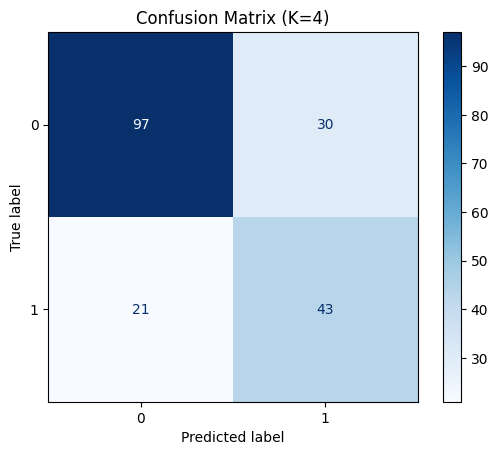

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Best K se Final Model
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(x_train_resampled, y_train_resampled)
y_pred_best = knn_best.predict(x_test)

print(f"Best K = {best_k}")
print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title(f'Confusion Matrix (K={best_k})')
plt.show()

##  Conclusion

This project demonstrates a **complete ML pipeline** for diabetes prediction using KNN.

### Techniques Applied:
| Step | Technique | Purpose |
|------|-----------|---------|
| 1 | Zero Value Imputation | Fix invalid medical data |
| 2 | IQR Outlier Removal | Cleaner training data |
| 3 | StandardScaler | Normalize features for KNN |
| 4 | SMOTE | Balance class distribution |
| 5 | K-Tuning | Find optimal K value |

### Final Results:
| Model | Accuracy |
|-------|----------|
| Default K=5 | 71% |
| **Best K=4** | **73%** |

> **Glucose and BMI** are the strongest predictors of diabetes in this dataset.
